Welcome to my final project for Intro to Machine Learning: Supervised Learning!
For this project I wanted to explore a dataset I have been building myself over the last several months. I am a big golfer and currently work at a indoor golf simulator. There we have several golf launch monitors that have 4 cameras in them that take pictures and videos at high speed that can capture data on both the golf ball and the gof club to predict many attributes of your shot. My goal was to collect data for 9 of my golf clubs from my driver to my pitching wedge. I wanted to collect ~100 shots with each club. I don't quite have 100 shots for each but rather closer to ~80 with each club. I still think that will be plenty to work with for this project. 

I wanted to focus my project into a classification problem. One where I can look at the data and categorize each shot into 1 of 4 categories. Great, Good, OK, and Bad. I believe that classifying my golf shots in this way can offer me good insight into my own golf game and help me improve in the future.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
golf_data = pd.read_csv("golf_data.csv")

DATA CLEANING

My dataset is not perfect and will need some tuning before diving into it. Fist I want to get rid of al the clubs that are not my clubs of focus (Driver, 3W, 4H, 5I, 6I, 7I, 8I, 9I, PW). Clubs like putter snad wedge, and gap wedge are featured in this dataset as the software I was recording my golf shots on always confused my first few warm up shot I took with a 58 Degree wedge. We can cut all the putter shots and any other wedge shots like a sand wedge or gap wedge.  

In [3]:
# Getting rid of unwanted clubs and checking length of dataset

golf_data = golf_data[golf_data["Club Type"] != "Putter"]
golf_data = golf_data[golf_data["Club Name"] != "GW"]
golf_data = golf_data[golf_data["Club Name"] != "SW"]
golf_data = golf_data[golf_data["Club Name"] != "LW"]
golf_data = golf_data[golf_data["Club Name"] != "2h"]
golf_data = golf_data[golf_data["Club Name"] != "4i"]
len(golf_data)

879

Another task of data cleaning I made a mental note of when recording the data was that sometimes after my first shot or two the software would default back to thinking I was hitting my driver. So I have several instances where a shot taken with my pitching wedge or 9 iron were recorded as a driver. These should be easy enough to find as club speeds between those clubs 

In [4]:
# First look into the dataset and all the columns we have available to us
# Then we are looking for and isolating the driver shots that were mislabeled
pd.set_option('display.max_columns', None)
suspicious_driver_shots = golf_data[
    (golf_data['Club Type'] == 'Driver') & 
    (golf_data['Club Speed (mph)'] < 85)
]

suspicious_driver_shots.head(20)


,Shot Number,Club Name,Club Type,Shot Created Date,Ball Speed (mph),Push/Pull (deg L-/R+),Launch Angle (deg),Back Spin (rpm),Side Spin (rpm L-/R+),Total Spin (rpm),Carry (yds),Total Distance (yds),Offline (yds L-/R+),Peak Height (yds),Descent Angle (deg),Club Speed (mph),Club Speed at Impact Location (mph),Efficiency,Angle of Attack (deg),Club Path (deg out-in-/in-out+),Face to Target (deg closed-/open+),Lie (deg toe down-/toe up+),Loft (deg),Face Impact Horizontal (mm toe-/heel+),Face Impact Vertical (mm low-/high+),Closure Rate (deg/sec)
14,15,Dr,Driver,04/15/2025 02:58:55,98.4,1.6,23.4,7008,134,7009,127.9,137.2,5.2,27.5,47.6,80.0,80.5,1.22,-4.6,2.2,1.5,1.5,33.9,3,-18,2458.5
108,2,Dr,Driver,04/01/2025 02:45:41,91.7,-1.6,26.9,7688,-147,7689,115.3,123.9,-4.6,28.0,49.8,78.2,78.3,1.18,-5.0,-0.9,-2.6,0.2,38.4,-8,-5,2169.6
347,4,Dr,Driver,03/25/2025 01:48:02,91.7,-0.6,27.9,7040,-455,7055,116.1,125.2,-5.1,28.9,50.0,78.3,78.3,1.18,-3.4,1.2,-3.1,0.9,40.4,0,-3,1969.7
466,13,Dr,Driver,02/19/2025 03:38:49,85.0,1.7,30.2,7229,-277,7234,104.4,112.8,1.5,26.8,50.5,75.4,73.8,1.13,-1.5,3.7,0.6,1.8,42.8,16,-11,1830.6
626,2,Dr,Driver,04/20/2025 00:49:59,80.5,3.6,30.1,8501,564,8520,95.7,102.3,9.5,23.9,49.6,77.8,76.1,1.04,-5.7,1.8,5.7,0.5,44.6,12,-5,1948.9
737,17,Dr,Driver,04/12/2025 18:59:43,82.8,4.9,25.8,9411,1676,9559,99.5,105.9,17.6,21.4,46.8,78.3,78.3,1.06,-5.7,2.1,7.8,1.4,42.6,7,-20,1859.1
922,17,Dr,Driver,04/11/2025 18:26:23,87.2,-0.2,22.3,7475,535,7494,109.0,117.8,3.2,19.9,43.1,79.4,78.3,1.10,-5.1,2.4,0.8,3.2,39.9,16,-23,2057.4


Okay now that I have identified my mislabelled driver shots I can observe the data and determine which clubs they acutally are and correctly relabel them. 

In [5]:
# Relabeling those driver shots into their correct clubs
golf_data.loc[14, 'Club Name'] = '9i'
golf_data.loc[14, 'Club Type'] = 'Iron'
golf_data.loc[108, 'Club Name'] = 'PW'
golf_data.loc[108, 'Club Type'] = 'Wedge'
golf_data.loc[347, 'Club Name'] = 'PW'
golf_data.loc[347, 'Club Type'] = 'Wedge'
golf_data.loc[466, 'Club Name'] = 'PW'
golf_data.loc[466, 'Club Type'] = 'Wedge'
golf_data.loc[626, 'Club Name'] = 'GW'
golf_data.loc[626, 'Club Type'] = 'Wedge'
golf_data.loc[737, 'Club Name'] = 'PW'
golf_data.loc[737, 'Club Type'] = 'Wedge'
golf_data.loc[108, 'Club Name'] = 'PW'
golf_data.loc[922, 'Club Type'] = 'Wedge'

# I discovered that one of the shots was from a GW so we can take it out entirely
golf_data = golf_data[golf_data["Club Name"] != "GW"]
print(len(golf_data))

878


Okay, so far we have removed data from the clubs we don't necessarily need/want, then we correctly relabeled some data points that I had seen as incorrect. Before finishing the data cleaning phase, I wanted to define our shot types. With defining shot types we can narrow down which columns we will need going forward. 

I put a lot of thought into which data metrics should be kept and how they should be prioritized. 
I determined that the following metrics are going to be kept in our dataset and be used to define great. good, OK, and bad shots.

In order of importance here are the metrics we will be using.
1. Offline (yds L-/R+): How far offline the ball ended up from our target line.

2. Carry (yds): How far the ball carried in the air before hitting the ground.

3. Face Impact Horizontal (mm toe-/heel+): How far from the center of the club face the ball was struck. Negative values indicate shots hit towards the toe, positive values indicate shots hit towards the heel of the club.

4. Peak Height (yds): The highest point in the air the ball was hit.

5. Club Path (deg out-in-/in-out+): How many degrees your club path took before striking the ball. Negative values indicate a shot that was hit Out-to-In, positive values indicate a shot that was hit In-To-Out .

6. Push/Pull (deg L-/R+): Push is when the ball starts right of the target line, Pull is when the ball starts left of the target line. This is measured in degrees from target line. Negative values are a pull, positives are a push.

7. Total Distance (yds): Carry distance + how far the ball rolls out after hitting the ground.

8. Total Spin (rpm): Measures backspin + sidespin

9. Face Impact Vertical (mm low-/high+): How far from the center of the club face the ball was struck. Negative values indicate shots hit towards the leading edge (bottom) of the club, positive values indicate shots hit towards the top of the club. (Something to note This was a mertic I always though was a little off, I feel it was maybe 5 degrees toward the leading edge on shots that felt perfect to me.)


Lets trim down our dataset to these columns.

In [25]:
# selecting the columns we are keeping, then checking to make sure we get the changes we wanted
selected_columns = [
    'Club Name',
    'Offline (yds L-/R+)',
    'Carry (yds)',
    'Face Impact Horizontal (mm toe-/heel+)',
    'Peak Height (yds)',
    'Club Path (deg out-in-/in-out+)',
    'Push/Pull (deg L-/R+)',
    'Total Distance (yds)',
    'Total Spin (rpm)',
    'Face Impact Vertical (mm low-/high+)',

]
golf_df = golf_data[selected_columns]
golf_df = golf_df.reset_index(drop=True)
golf_df.head()

# Checkout the first Offline Value!!!! We will need to fix that

,Club Name,Offline (yds L-/R+),Carry (yds),Face Impact Horizontal (mm toe-/heel+),Peak Height (yds),Club Path (deg out-in-/in-out+),Push/Pull (deg L-/R+),Total Distance (yds),Total Spin (rpm),Face Impact Vertical (mm low-/high+)
0,9i,303.5,119.1,-20,22.9,0.1,1.4,128.6,6820,-3
1,9i,5.2,127.9,3,27.5,2.2,1.6,137.2,7009,-18
2,9i,17.1,119.0,0,23.5,0.2,3.2,127.4,8129,-22
3,9i,13.5,124.8,5,20.8,2.2,1.7,134.9,6925,-25
4,9i,24.7,119.2,10,18.9,3.2,5.0,129.5,7124,-27


We are also going to keep Club Name but it will not be used in our anaylsis. 
All of the metrics that we will be looking at are numerical. 
We will now be left with 10 features. 1 categorical (Club Name), and 9 numerical. After our data cleaning we will have 883 rows left in our dataset. 878 shots between 9 different clubs to categorize. 

I can quickly see an error in the first shot as there is no way I could hit a 9i 300 yds offline. Let's go through all the clubs and get rid of these wierd outliers. I will take the average of all other shots that have an offline of 25-35 depending on the club. Driver and other longer clubs will have some extra leeway.

In [8]:
# Define a dictionary with clubs as keys and their corresponding acceptable offline thresholds (in yards)
offline_thresholds = {
    'PW': 25,
    '9i': 25,
    '8i': 25,
    '7i': 30,
    '6i': 30,
    '5i': 30,
    '4h': 30,
    '3w': 35,
    'Dr': 35,

}

# Function to clean up outlier "Offline" values for a specific club based on a threshold
def clean_offline_for_club(club, df, threshold):

    # Filter the dataframe to include only shots taken with the specified club
    club_shots = df[df['Club Name'] == club]
    valid_shots = club_shots[club_shots['Offline (yds L-/R+)'].abs() <= threshold]

    # Only proceed if there are valid shots within the threshold
    if not valid_shots.empty:  

        # Calculate the average absolute offline distance of the valid shots
        avg_offline = valid_shots['Offline (yds L-/R+)'].abs().mean()
        rounded_avg = round(avg_offline, 1)

        # Create a mask to identify outlier shots with offline distance greater than the threshold
        outlier_mask = (df['Club Name'] == club) & (df['Offline (yds L-/R+)'].abs() > threshold)
        # Replace the outlier values with the average offline (preserving direction using sign)
        df.loc[outlier_mask, 'Offline (yds L-/R+)'] = df.loc[outlier_mask, 'Offline (yds L-/R+)'].apply(
            lambda x: np.sign(x) * rounded_avg
        )
            
        print(f"Club: {club}, Average Offline: {avg_offline:.2f} yards")
    else:
        print(f"Club: {club}, No valid shots within the threshold.")

    return df

# Apply the cleaning function to each club using its corresponding threshold
for club, threshold in offline_thresholds.items():
    golf_df = clean_offline_for_club(club, golf_df, threshold)

golf_df.head()

Club: PW, Average Offline: 6.40 yards
Club: 9i, Average Offline: 6.80 yards
Club: 8i, Average Offline: 8.32 yards
Club: 7i, Average Offline: 9.78 yards
Club: 6i, Average Offline: 11.35 yards
Club: 5i, Average Offline: 13.07 yards
Club: 4h, Average Offline: 11.48 yards
Club: 3w, Average Offline: 12.09 yards
Club: Dr, Average Offline: 15.84 yards


,Club Name,Offline (yds L-/R+),Carry (yds),Face Impact Horizontal (mm toe-/heel+),Peak Height (yds),Club Path (deg out-in-/in-out+),Push/Pull (deg L-/R+),Total Distance (yds),Total Spin (rpm),Face Impact Vertical (mm low-/high+)
0,9i,6.8,119.1,-20,22.9,0.1,1.4,128.6,6820,-3
1,9i,5.2,127.9,3,27.5,2.2,1.6,137.2,7009,-18
2,9i,17.1,119.0,0,23.5,0.2,3.2,127.4,8129,-22
3,9i,13.5,124.8,5,20.8,2.2,1.7,134.9,6925,-25
4,9i,24.7,119.2,10,18.9,3.2,5.0,129.5,7124,-27


Okay We have gotten rid of some of those outlier values, not quite sure why those outliers were so extreme. 

Exploratory Data Analysis



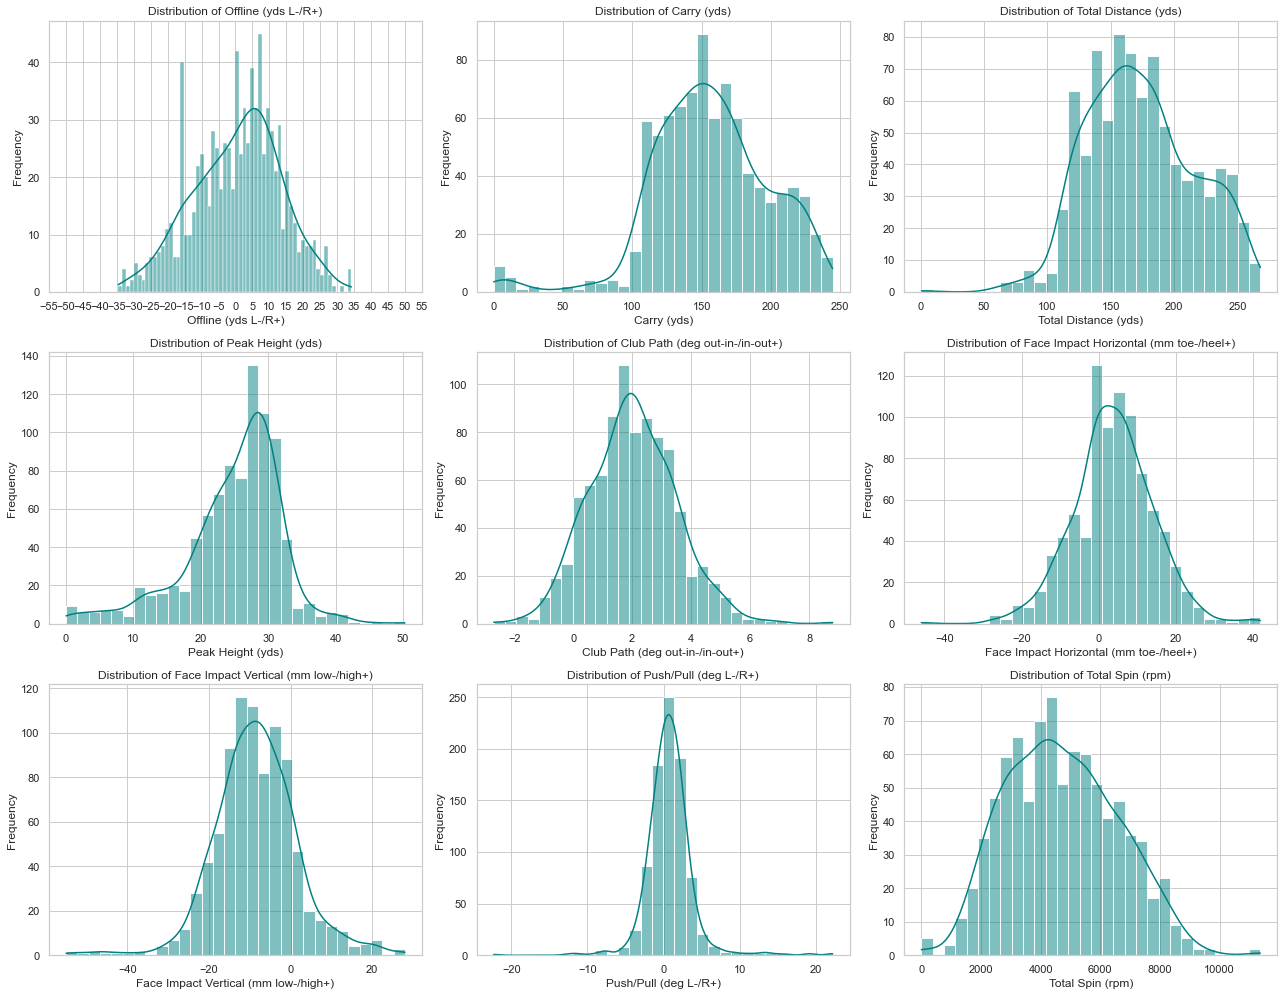

In [10]:


# Set plot style
sns.set(style='whitegrid')

# List of key features to plot
features = [
    'Offline (yds L-/R+)', 'Carry (yds)','Total Distance (yds)', 'Peak Height (yds)',
    'Club Path (deg out-in-/in-out+)', 'Face Impact Horizontal (mm toe-/heel+)',
    'Face Impact Vertical (mm low-/high+)', 'Push/Pull (deg L-/R+)', 'Total Spin (rpm)'
]

# Create histograms
plt.figure(figsize=(18, 14))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    if feature == 'Offline (yds L-/R+)':
        sns.histplot(golf_df[feature], bins=60, kde=True, color='teal')
        plt.xlim(-45, 45)
        plt.xticks(np.arange(-55, 60, 5))  # Tick marks every 5 yards
    else:
        sns.histplot(golf_df[feature], bins=30, kde=True, color='teal')

    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In our first look into these histograms, we can see the frequency distributions for all of our features. Let's go through each one briefly.  

Offline: We can see the the majority of my shots ended up about 1 to 8 yds offline. The rest of the shots are fairly balanced around that 1-8 metric. We see many shots on either side the actually a few more shots to the left. I believe this to be pretty accurate, for when I hit the ball well, with any club I typically push the ball a little with a draw(Right to left ball flight). This can cause me to hit on either side of my target line but usally ending up just right of my target line. When I hit a bad shot I usually tend to hit it really left as opposed to really right. 

Carry: Most shots between all my clubs carry at least > 100 yds. That make a lot of sense as my PW is my shortest club of the bunch and typically carries ~110. All of the shots that carry below that 100 yd mark are likely extremely bad hits. We also see the most shot around the 150 mark. I have two clubs that can hit around that value so I expected to see more of that yardage. Also adding to this value could be poor shots with longer clubs. Example a poorly hit 3w could end up carrying around this number. 

Total distance: Very similar to the carry distribution. We see a drop off in distacne right about where carry seemed to drop off. Thats right around where the longer clubs are hit. 

Peak Height: When hitting fairly well I expect most of my clubs to reach ~25 yards in height. I'm not very surprised by the distribution in height here. Again many of the low values here can probably be explained by poor shots. 

Club Path: Another metric that makes complete sense to me. I typically have an in to out club path across my clubs so it is no surprise that the majority of my shots were hit this way. 

Face Impact Horizontal:  This histogram was a bit surprising to me. I thought that my usual miss is on the toe, but clearly er see that it is actually towards the heel. 

Face Imapact Vertical: This metric I always found tricky. Even on shots that I thought were perfect still read that i was hitting low on the clulb face. Perhaps this metric isnt as consistent as I think. I'm no surprised that the majority of these shots are low on the face.  

Push/Pull: There is a high tendency towards a slight push which I thinkis pretty typical in my swing. Much of Push and Pull is determined by club path, so I'm not surprised that these two metrics are distributed similarly. 

Total Spin: I'm not too sure about putting this metric in, but i think it is still interesting. Every club is meant to hit different spin rates, but im not surprused that the majority of the spins rates were around the high 4000s low 5000s. 

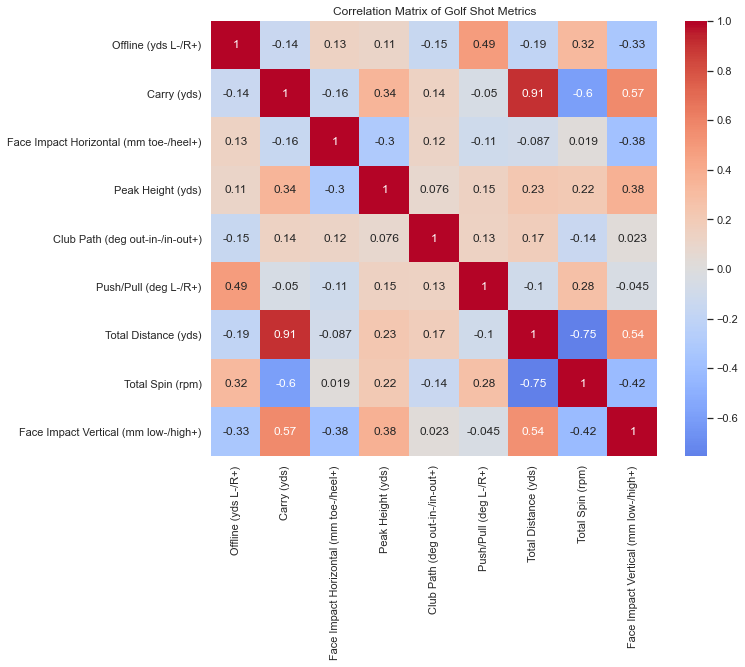

In [11]:
numeric_cols = golf_df.select_dtypes(include='number')

# Compute correlation
correlation = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Golf Shot Metrics')
plt.show()

Our correlation matrix is pretty interesting in a couple places. We expected high correlation between Carry and Total distance, no one is surprised by that. Is also not very surprising to see Total Spin so negatively correlated with Carry and Total Distance as more spin cause the ball to stop closer to wher it hit the ground. In order to address the risk of multicollinearlity, I will wiegh Total Distance at a much lower rate than Carry when we give weight to our features. While they are close I still think Total Distance has some weight into determining a good shot, even if its weight will be very low. I did think that it was interesting to see Carry and Total distance be so correlated with Verical Face Impact. If I had to guess before this, I would've thought there may be more correlation with Horizonal Face Impact and the distance measures. Lastly we can see that Total Spin and Vertical Face Impact are negetively correlated. This means that that hitting low on the face can indeed be a factor in producing more spin and hitting shot higher on the face might cause the ball to spin less. 

What can we take away from out early data analysis that might help us in our original goal ofcategorizing these golf shots?
We can pretty much treat carry and total distance the same, we kinda knew that already though but now we have the numbers to back it up. Vertical impact is fairly correlated with carry. I think carry is a very important factor when classifiying good golf shots. Because of this I think Vertical Face Impact will be more important than we originally thought! Observing higher spin rates and vertical impact together could tell us alot about whether or not the shot was hit well.  

Defining what is Great, Good, OK, and Bad


Let's now define what is going to determine what category our shots will fall into. After seeing the strong correlation between vertical face impact and carry distance, we will be moving that up the order, but lets start with the offline metric.
Longer clubs like the driver, 3w, 4h, etc... will naturally go further but have more dispursion. Example: Hypothetically I could hit 20 yards offline with my driver and still be in the fairway. I would still consider this a good shot. However, if i were to hit my 9i 20 yards offline it would be a bad shot as my ball would probably miss the green or wherever I was aiming. 

Therefore, Offline will offer some forgiveness as we get further into the clubs. While this is a bit tricky, I think this is the most important metric. Here is an idea of how each club will be measured for the offline metric. 

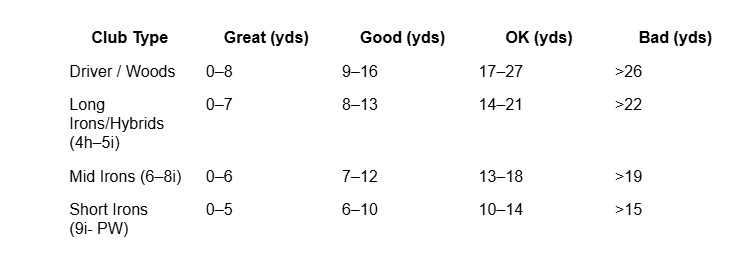

Carry distance is quite a bit simpler. We will categorize into percent based thresholds.  
Great shots will be 95%-100% of max carry for each club  
Good shots will be 89% - 94%   
Ok will be 80% - 88%   
Bad will be <80%  


Next up is vertical face impact. I explained earlier that i felt even on perfect strikes that my readings would still come out low. This may be due to high visibility sticker placement on my clubs. 4 reflective stickers were placed on each club to measure things like this. Perhaps where I placed the stickers caused this to read low even on well struck shots. Therefore I will add some padding into my categorization of this feature.
Great: -9mm to +9mm  
Good: -15mm to -10mm OR +10mm to +15mm    
OK:  -20mm to -16mm OR +16mm to +20mm  
Bad: <-25mm OR >+25mm


Moving onto Peak Height, we will categorize this metric like we did with carry.  
Great shots will be 96%-100% of max height for each club  
Good shots will be 90% - 95%   
Ok will be 85% - 90%  
Bad will be <85% 

Club Path is up next. This will be different for every golfer but these values are tailored to me.  
Great: between -2.5° and +2.5°  
Good: between -4° to -2.6° or +2.6° to +4°  
OK: between -6° to -4.1° or +4.1° to +6°  
Bad: < -6° or > +6°  

Horizontal face impact I thought would be more important than what was proven in the correlation matrix so it has fallen down the order a little bit.   
Great: between -6.5mm and +6.5mm  
Good: between -12.5mm to -6.6mm or +6.6mm to +12.5mm  
OK: between -16mm to -12.6mm or +12.6mm to +16mm  
Bad: < -16.1mm or > +16.1mm 

Push/Pull while towards the bottom of the list is still an important factor to consider when categorizing these shots.  
Great: between -2° and +2°  
Good: between -3.5° and -2.1° or +2.1° and +3.5°  
OK: between -5° and -3.6° or +3.6° and +5°  
Bad: < -5° or > +5°  

Spin is another tricky one. I can hit what I would consider a good shot and the spin rate coudl be quite different. That is why I have put spin lower on this list of importance. Here are the threshold we will be using. Like Offline, different clubs will require different spin rates.

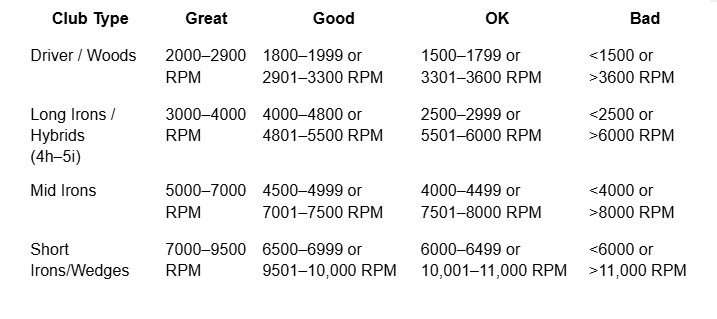


Total Distance is last as it is pretty muich the same as carry. The thresholds for total distance will be the same as carry.


Giving wieght to our metrics is our next task in defining these shots. Obviously we need to weight some features differently than others. Here is what I came up with in terms of weight.

Offline → 30%  
Carry → 25%  
Face Impact Vertical → 12.5%  
Peak Height → 10%  
Club Path → 10%  
Face Impact Horizontal → 7.5%  
Push/Pull → 2%  
Spin → 2%  
Total Distance → 1%
 
After weighting we will go over each shot and determine which category each metric falls under.  
Great = 4 points  
Good = 3 points  
OK = 2 points  
Bad = 1 point  
Then we will multiply each metric's points * its weight and add the total.   
Great Shot = final score 3.5 or higher  
Good Shot = 3.0–3.49  
OK Shot = 2.0–2.99  
Bad Shot = below 2.0  

Next we will write the code to implement all of these values and scores properly.

In [12]:
# Calculate max values per club
club_max_values = golf_df.groupby('Club Name').agg({
    'Carry (yds)': lambda x: np.percentile(x, 90),
    'Total Distance (yds)': 'max',
    'Peak Height (yds)': 'max',
    'Total Spin (rpm)': 'mean'  # Using mean for spin, not max
}).reset_index()

# Rename for clarity
club_max_values.rename(columns={
    'Carry (yds)': 'Max_Carry',
    'Total Distance (yds)': 'Max_Total_Distance',
    'Peak Height (yds)': 'Max_Peak_Height',
    'Total Spin (rpm)': 'Ideal_Spin'
}, inplace=True)


def get_club_group(club_name):
    club_name = club_name.lower()
    if "driver" in club_name or "wood" in club_name:
        return "Driver/Wood"
    elif "hybrid" in club_name or "4" in club_name or "5" in club_name:
        return "Long Iron/Hybrid"
    elif "6" in club_name or "7" in club_name or "8" in club_name:
        return "Mid Iron"
    else:  # assume wedge, short irons
        return "Short Iron/Wedge"


# Merge back onto original data
golf_df = golf_df.merge(club_max_values, on='Club Name', how='left')

def calculate_shot_quality(row):
    total_score = 0

    # --- Offline ---
    offline = abs(row['Offline (yds L-/R+)'])
    club_group = get_club_group(row['Club Name'])

    if club_group == "Driver/Wood":
        if offline <= 8:
            points = 4
        elif offline <= 16:
            points = 3
        elif offline <= 27:
            points = 2
        else:
            points = 1
    elif club_group == "Long Iron/Hybrid":
        if offline <= 7:
            points = 4
        elif offline <= 13:
            points = 3
        elif offline <= 21:
            points = 2
        else:
            points = 1
    elif club_group == "Mid Iron":
        if offline <= 6:
            points = 4
        elif offline <= 12:
            points = 3
        elif offline <= 18:
            points = 2
        else:
            points = 1
    else:  # Short Iron/Wedge
        if offline <= 5:
            points = 4
        elif offline <= 10:
            points = 3
        elif offline <= 14:
            points = 2
        else:
            points = 1

    total_score += points * 0.30  # Offline weight

    # --- Carry Distance ---
    carry_ratio = row['Carry (yds)'] / row['Max_Carry']  # assuming you have Max_Carry column
    if carry_ratio >= 0.90:
        points = 4
    elif carry_ratio >= 0.85:
        points = 3
    elif carry_ratio >= 0.80:
        points = 2
    else:
        points = 1
    total_score += points * 0.25  # Carry weight

    # --- Face Impact Vertical ---
    vert_impact = row['Face Impact Vertical (mm low-/high+)']
    if -9 <= vert_impact <= 9:
        points = 4
    elif -15 <= vert_impact <= -10 or 10 <= vert_impact <= 15:
        points = 3
    elif -20 <= vert_impact <= -16 or 16 <= vert_impact <= 20:
        points = 2
    else:
        points = 1
    total_score += points * 0.125  # Face Impact Vertical weight

    # --- Peak Height ---
    peak_height_ratio = row['Peak Height (yds)'] / row['Max_Peak_Height']  # assuming Max_Peak_Height
    if peak_height_ratio >= 0.96:
        points = 4
    elif peak_height_ratio >= 0.90:
        points = 3
    elif peak_height_ratio >= 0.85:
        points = 2
    else:
        points = 1
    total_score += points * 0.10  # Peak Height weight

    # --- Club Path ---
    club_path = row['Club Path (deg out-in-/in-out+)']
    if -2.5 <= club_path <= 2.5:
        points = 4
    elif (-2.6 <= club_path <= -2.1) or (2.1 <= club_path <= 2.6):
        points = 3
    elif (-5 <= club_path <= -3.6) or (3.6 <= club_path <= 5):
        points = 2
    else:
        points = 1
    total_score += points * 0.10  # Club Path weight

    # --- Face Impact Horizontal ---
    horiz_impact = row['Face Impact Horizontal (mm toe-/heel+)']
    if -6.5 <= horiz_impact <= 6.5:
        points = 4
    elif (-12.5 <= horiz_impact <= -6.6) or (6.6 <= horiz_impact <= 12.5):
        points = 3
    elif (-16 <= horiz_impact <= -12.6) or (12.6 <= horiz_impact <= 16):
        points = 2
    else:
        points = 1
    total_score += points * 0.075  # Face Impact Horizontal weight

    # --- Push/Pull (Start Line Angle) ---
    start_angle = row['Push/Pull (deg L-/R+)']
    if -2 <= start_angle <= 2:
        points = 4
    elif (-3.5 <= start_angle <= -2.1) or (2.1 <= start_angle <= 3.5):
        points = 3
    elif (-5 <= start_angle <= -3.6) or (3.6 <= start_angle <= 5):
        points = 2
    else:
        points = 1
    total_score += points * 0.02  # Push/Pull weight

    # --- Spin ---
    spin_ratio = row['Total Spin (rpm)'] / row['Ideal_Spin']  # assuming Ideal_Spin available
    if 0.90 <= spin_ratio <= 1.10:  # within 10% of ideal spin
        points = 4
    elif 0.80 <= spin_ratio <= 0.89 or 1.11 <= spin_ratio <= 1.20:
        points = 3
    elif 0.70 <= spin_ratio <= 0.79 or 1.21 <= spin_ratio <= 1.30:
        points = 2
    else:
        points = 1
    total_score += points * 0.02  # Spin weight

    # --- Total Distance ---
    total_dist_ratio = row['Total Distance (yds)'] / row['Max_Total_Distance']
    if total_dist_ratio >= 0.96:
        points = 4
    elif total_dist_ratio >= 0.90:
        points = 3
    elif total_dist_ratio >= 0.85:
        points = 2
    else:
        points = 1
    total_score += points * 0.01  # Total Distance weight

    # --- Final Shot Quality ---
    if total_score >= 3.5:
        return "Great"
    elif total_score >= 3.0:
        return "Good"
    elif total_score >= 2.0:
        return "OK"
    else:
        return "Bad"

golf_df['Shot Quality'] = golf_df.apply(calculate_shot_quality, axis=1)

In [13]:
summary = golf_df.groupby(['Club Name', 'Shot Quality']).size().unstack(fill_value=0)

# Display the summary
print(summary)

golf_df[golf_df['Club Name'] == '4h']

Shot Quality  Bad  Good  Great  OK
Club Name                         
3w             17    19     10  42
4h              3    29     21  45
5i              5    31     15  37
6i              3    30     27  40
7i              7    33     26  39
8i              0    53     22  27
9i              5    44     30  32
Dr             12    10      5  69
PW              1    32     31  26


,Club Name,Offline (yds L-/R+),Carry (yds),Face Impact Horizontal (mm toe-/heel+),Peak Height (yds),Club Path (deg out-in-/in-out+),Push/Pull (deg L-/R+),Total Distance (yds),Total Spin (rpm),Face Impact Vertical (mm low-/high+),Max_Carry,Max_Total_Distance,Max_Peak_Height,Ideal_Spin,Shot Quality
45,4h,4.9,179.6,16,21.4,0.6,-2.3,195.1,4400,-7,200.83,231.1,30.6,3613.265306,Good
46,4h,-13.5,194.6,13,23.6,1.1,-2.3,213.1,3210,0,200.83,231.1,30.6,3613.265306,OK
47,4h,-15.3,198.4,-1,21.3,2.2,0.5,220.0,2499,4,200.83,231.1,30.6,3613.265306,Good
48,4h,15.0,154.1,29,12.0,2.5,-2.6,172.2,4084,-12,200.83,231.1,30.6,3613.265306,Bad
49,4h,3.3,161.3,24,22.9,-0.2,-2.6,176.1,4190,4,200.83,231.1,30.6,3613.265306,OK
50,4h,24.5,199.2,3,27.2,2.3,2.8,215.2,3924,-4,200.83,231.1,30.6,3613.265306,OK
51,4h,-20.2,193.9,10,20.3,0.3,-4.1,210.3,3385,-5,200.83,231.1,30.6,3613.265306,OK
52,4h,4.5,187.5,8,21.3,2.4,-0.6,204.2,3984,-6,200.83,231.1,30.6,3613.265306,Great
53,4h,5.1,191.7,13,24.4,2.1,0.0,207.6,4035,-4,200.83,231.1,30.6,3613.265306,Great
54,4h,-3.2,201.0,5,25.1,1.9,0.2,221.1,2665,3,200.83,231.1,30.6,3613.265306,Great


Models

For the models we will be using for our classification are Decision Tree and Random Forest.
Starting with decision tree we will get a baseline for good interpretability. Training a random forest after that would give us better performance and then we will compare with the results from logistic regression. 


1. Decision Tree

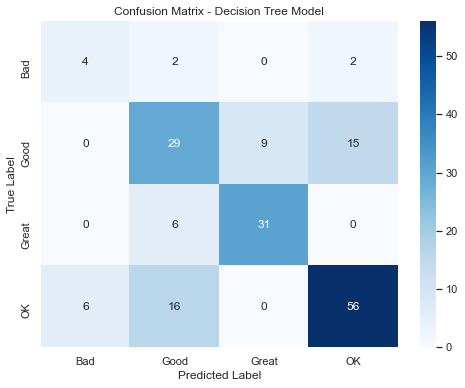


Classification Report:
               precision    recall  f1-score   support

         Bad       0.40      0.50      0.44         8
        Good       0.55      0.55      0.55        53
       Great       0.78      0.84      0.81        37
          OK       0.77      0.72      0.74        78

    accuracy                           0.68       176
   macro avg       0.62      0.65      0.63       176
weighted avg       0.69      0.68      0.68       176



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# X = the features we'll use to predict shot quality
X = golf_df[['Offline (yds L-/R+)',
          'Carry (yds)',
          'Face Impact Horizontal (mm toe-/heel+)',
          'Peak Height (yds)',
          'Club Path (deg out-in-/in-out+)',
          'Push/Pull (deg L-/R+)',
          'Total Distance (yds)',
          'Total Spin (rpm)',
          'Face Impact Vertical (mm low-/high+)']]

# y = the target variable (your Shot Quality label)
y = golf_df['Shot Quality']

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 3: Fit the model to training data
dt_model.fit(X_train, y_train)

# Step 4: Predict on the test data
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate
class_labels = ['Bad', 'Good', 'Great', 'OK']

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Pretty print the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Lets discuss our first Decision tree model and confusion matrix.
in our first row of the matrix we see that Bad is predicted correctly 4 times, predicted Good twice and OK twice. I think we can probably do better here as 50% of the predictions were mislabeled.  
The second row correctly predicts Good shots 29 times, predicts great 9 times and OK 15 times. Once again this is alright but there is definite room for improvements!  
The third row is pretty decent at 31 correct Great shot predictions and a 6 good shot predictions. Better than the first two rows but we would like to see a little more improvement.
The final row correctly predicts OK shots 56 times, with 6 Bad and 16 Good shots. Not bad again, but we can do better!


Looking out our decision tree model we can see that precision recall and f1 score are all the highest on Great and OK shots, but are very low for bad and good shots. I think we can improve our model to get some better values. Let's add a max_depth to the model.

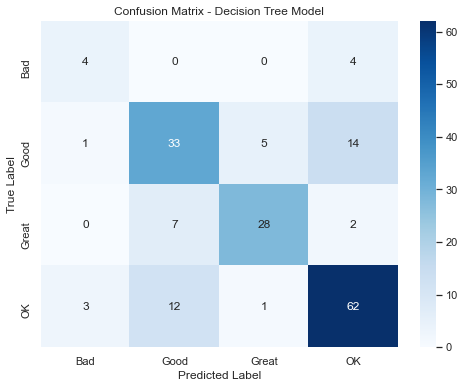


Classification Report:
               precision    recall  f1-score   support

         Bad       0.50      0.50      0.50         8
        Good       0.63      0.62      0.63        53
       Great       0.82      0.76      0.79        37
          OK       0.76      0.79      0.77        78

    accuracy                           0.72       176
   macro avg       0.68      0.67      0.67       176
weighted avg       0.72      0.72      0.72       176



In [26]:
# Step 2: Initialize Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)

# Step 3: Fit the model to training data
dt_model.fit(X_train, y_train)

# Step 4: Predict on the test data
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate
class_labels = ['Bad', 'Good', 'Great', 'OK']

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Pretty print the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

I we play around with max_depth in our decision tree we can try and find some extra overall accuracy. We find that a max_depth of 6 gives us the greatest accuaracy. This isn't exactly to the levels we would want to see. If we add in a min_samples = ? to our parameters perhaps we can find a little bit more accuracy before moving onto a different model. 

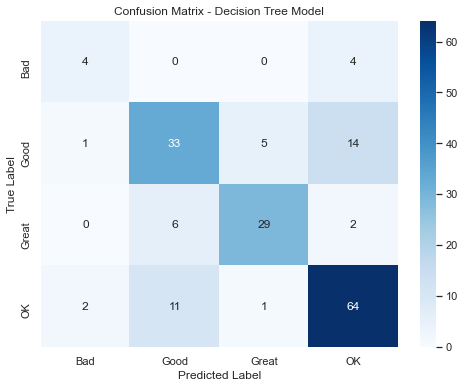


Classification Report:
               precision    recall  f1-score   support

         Bad       0.57      0.50      0.53         8
        Good       0.66      0.62      0.64        53
       Great       0.83      0.78      0.81        37
          OK       0.76      0.82      0.79        78

    accuracy                           0.74       176
   macro avg       0.71      0.68      0.69       176
weighted avg       0.74      0.74      0.74       176



In [16]:

dt_model = DecisionTreeClassifier(max_depth=6, min_samples_split=5 ,random_state=42)


dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)

class_labels = ['Bad', 'Good', 'Great', 'OK']


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


While inserting different values into min_sample_split, we found an extra 2% performance increase if we set it to = 5. This gave us a total of 74% accuracy. Not awful but far from ideal.  

Next we will try Random Forest model to see if we can increase our performance.

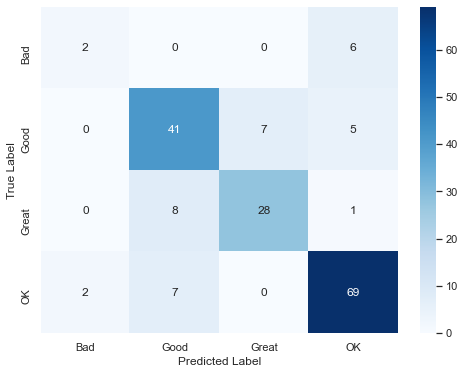

Confusion Matrix:
 [[ 2  0  0  6]
 [ 0 41  7  5]
 [ 0  8 28  1]
 [ 2  7  0 69]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.50      0.25      0.33         8
        Good       0.73      0.77      0.75        53
       Great       0.80      0.76      0.78        37
          OK       0.85      0.88      0.87        78

    accuracy                           0.80       176
   macro avg       0.72      0.67      0.68       176
weighted avg       0.79      0.80      0.79       176



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest instead of Decision Tree
rf_model = RandomForestClassifier(random_state=42, n_estimators= 100)

# Fit to training data
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In our first model of Random Forest we can see that right off the bat that we have some improvement. With 79% accuracy wwe are already 5% better than the decision tree! Some other take aways are that our OK classifier is working great in this model with 92% accuracy. The other classifiers could use some improvements however. 

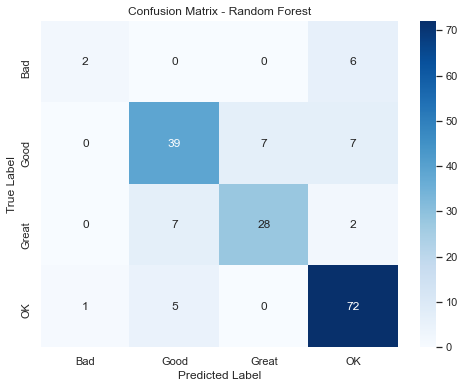

Confusion Matrix:
 [[ 2  0  0  6]
 [ 0 39  7  7]
 [ 0  7 28  2]
 [ 1  5  0 72]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.67      0.25      0.36         8
        Good       0.76      0.74      0.75        53
       Great       0.80      0.76      0.78        37
          OK       0.83      0.92      0.87        78

    accuracy                           0.80       176
   macro avg       0.76      0.67      0.69       176
weighted avg       0.80      0.80      0.79       176



In [18]:
# Initialize Random Forest instead of Decision Tree
rf_model = RandomForestClassifier(random_state=42, n_estimators= 300, max_depth = 11)

# Fit to training data
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

After playing with n_estimators and max_depth values I was not able to come up with an increase in overall performance in our random forest model. I was able to match the overall accuracy but this came when n_estimators = 300 and max_depth = 11. Thats 200 more n_estimators and and max_depth from none to 11. I personally dont think the added complexity and the risk of overfitting that comes with that is NOT worth the 0% increase. 
Some positive takeaways from this model are that OK shots had a great recall value at 92% in our slightly more complex model. This is great! Great and Good also saw improvements in precision and recall compared to Decision Tree. 
The Bad shot category was the one that struggled the most. I believe this to be from a lack of samples. I think from the whole dataset this is the category that is observed the least and because of that struggled in both of the model. 

Results

In my attempt to classify my personal golf data into 4 categories, we ended up determining which features of the golf data we were going to use, each feature's level of importance, and how to weigh each one accordingly. I decided to use the Decison Tree and Random Forest Models as they can easily handle non linear relationships and are easily interpreted as well as efficient and they work well with imbalanced data. Random Forests typically give a more robust and accurate model. In our Decision Tree we found decent performance predicting our categories but lacked in the performace we sought. In Random Forest we looked to improve the performance and saw a 5% increase in overall performance. The OK category performed well in both models but especially in Random Forest at 92% accuracy. Great and Good shots also saw better performance in the Random Forest Model. Bad shot struggled in both models unfortunately. I know that Bad shots were the category that had the least amount of samples and I believe this to be the cause of it's bad showing in my models. I think as time goes on and many more shots are recorded that If I were to keep these models that they would perform better with more samples. Looking at the OK shots, they were the most common category of shots and I think that that played a big part into why it performed so well in our final Random Forest Model.


Below I will show the total number of shots that went into each category, and our final models of Decision Tree and Random Forest.

In [19]:
category_count = golf_df['Shot Quality'].value_counts().reset_index()

# Rename the columns for better readability
category_count.columns = ['Shot Category', 'Total Shots']

# Display the result
print(category_count)

  Shot Category  Total Shots
0            OK          357
1          Good          281
2         Great          187
3           Bad           53


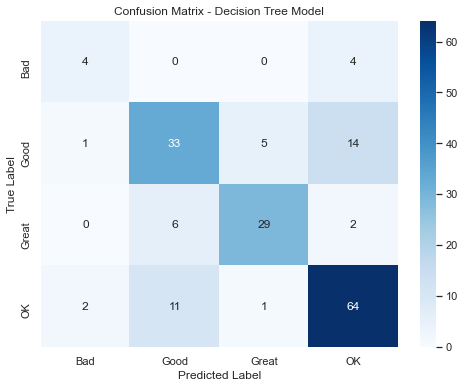


Classification Report:
               precision    recall  f1-score   support

         Bad       0.57      0.50      0.53         8
        Good       0.66      0.62      0.64        53
       Great       0.83      0.78      0.81        37
          OK       0.76      0.82      0.79        78

    accuracy                           0.74       176
   macro avg       0.71      0.68      0.69       176
weighted avg       0.74      0.74      0.74       176



In [20]:
## Final Decision Tree
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_split=5 ,random_state=42)


dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)

class_labels = ['Bad', 'Good', 'Great', 'OK']


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


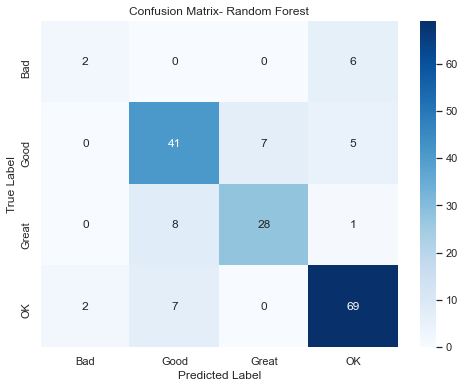


Classification Report:
               precision    recall  f1-score   support

         Bad       0.50      0.25      0.33         8
        Good       0.73      0.77      0.75        53
       Great       0.80      0.76      0.78        37
          OK       0.85      0.88      0.87        78

    accuracy                           0.80       176
   macro avg       0.72      0.67      0.68       176
weighted avg       0.79      0.80      0.79       176



In [21]:
rf_model = RandomForestClassifier(random_state=42, n_estimators= 100)

# Fit to training data
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix- Random Forest")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))